<a href="https://colab.research.google.com/github/jurtta66/tracking_synapse/blob/main/Kononov/Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Используем fast.ai

Сетап

In [1]:
! [ -e /content ] && pip install -Uqq fastbook nbdev
import fastbook
fastbook.setup_book()
from fastbook import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.2/492.2 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 46.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Сперва преобразуем кадры с видеокамер в картинки людей.
Для этого пробежимся по кадрам, на каждом детектируем людей, для каждой детекции обрежем bbox из кадра в новое изображение.


Путь к папке с кадрами

In [2]:
path = Path('/content/gdrive/MyDrive/comp_v/data/images/train')
path

Path('/content/gdrive/MyDrive/comp_v/data/images/train')

In [3]:
from fastai.vision.all import *
from torchvision.models.detection import fasterrcnn_resnet50_fpn
import torchvision.transforms as T

import matplotlib.pyplot as plt
import matplotlib.patches as patches

from PIL import Image

Скачаем предобученную модель для детекции

In [ ]:
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 156MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

Определим функции predict и отрисовки картинки кадра с bbox, 'вырезки' области из изображения

In [4]:
def predict(img):
    transform = T.Compose([T.ToTensor()])
    img = transform(img)
    with torch.no_grad():
        pred = model([img])[0]
    return pred['labels'].detach().numpy(), pred['boxes'].detach().numpy(), pred['scores'].detach().numpy()

def show_img_with_bbox(img, bbox):
    fig, ax = plt.subplots()
    ax.imshow(img)
    x1, y1, x2, y2 = bbox
    rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='g', facecolor='none')
    ax.add_patch(rect)
    plt.show()

def show_img(img):
    fig, ax = plt.subplots()
    ax.imshow(img)
    plt.show()

def crop_img(img, bbox):
    x1, y1, x2, y2 = map(int, bbox)
    return img.crop((x1, y1, x2, y2))

Закинем в папку вырезанные изображения людей.

In [5]:
output_path = Path('/content/gdrive/MyDrive/cv/synapse/person_images')
str(output_path)

'/content/gdrive/MyDrive/cv/synapse/person_images'

In [ ]:
i = 0
for img_path in path.ls():
    person_count = 0
    i += 1
    print(i, end = ', ')
    img = PILImage.create(img_path)
    labels, boxes, scores = predict(img)
    for label, bbox, score in zip(labels, boxes, scores):
        if label == 1 and score > 0.5:
            person_count += 1
            #print(f'Person detected in {img_path.name} with probability {score:.04f}')
            #print(f'Bounding box: {bbox}')
            person = crop_img(img, bbox)
            person.save(str(output_path) + '/' + str(i) + '_' + str(person_count) + '.jpg', 'JPEG')
            if len(output_path.ls()) > 100:
                print('done')
                input()
            #show_img_with_bbox(img, bbox)
            #show_img(person)
            #input()

1, 2, 3, 4, 5, 6, 7, 8, 9, done


KeyboardInterrupt: ignored

Теперь пропустим этих людей через resnet с обрезанным последним слоем, и для каждого человека сохраним вектор значений предпоследнего слоя. (если бы сохраняли последний слой реснет - то получили бы аргумент для сигмоиды -> вероятность, что на картинке человек или собака или допустим чайник. Нам это не нужно, мы знаем что на картинке человек.  

In [6]:
transform = T.Compose([
    T.Resize((256 * 3, 256)),
    T.ToTensor(),
    T.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])
transform_to_pil = T.ToPILImage()

Загружаем обрезанные изображения людей

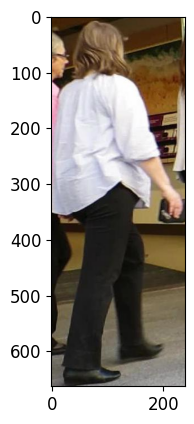

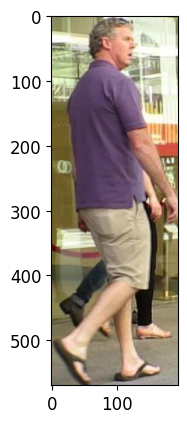

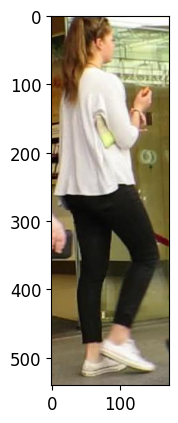

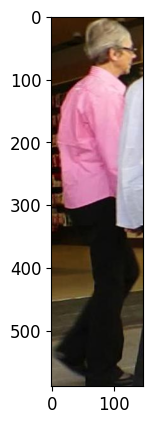

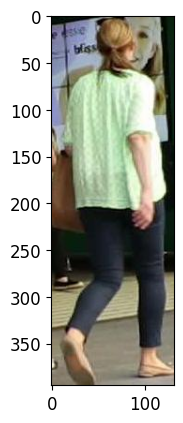

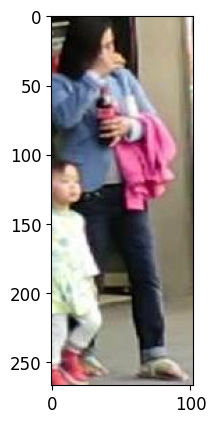

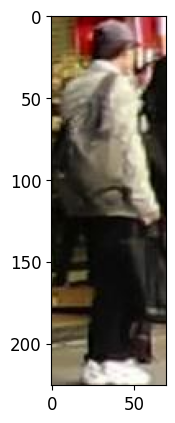

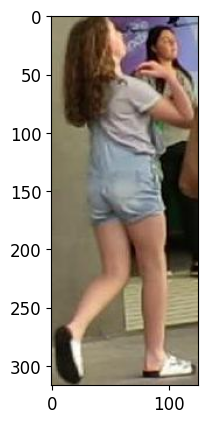

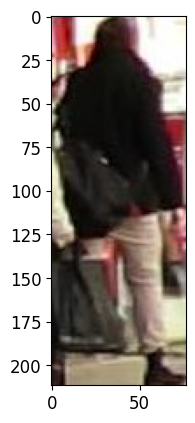

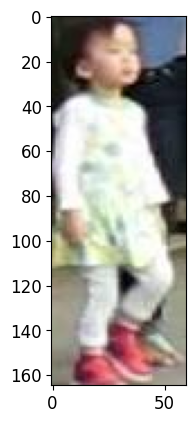

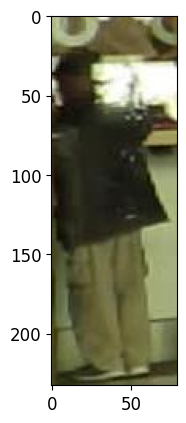

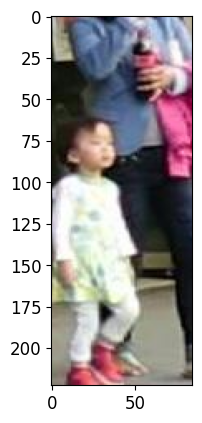

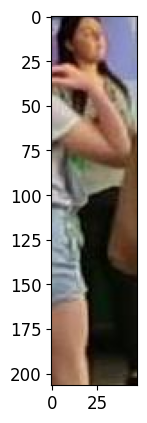

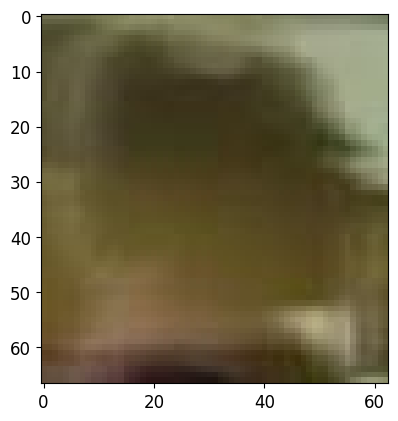

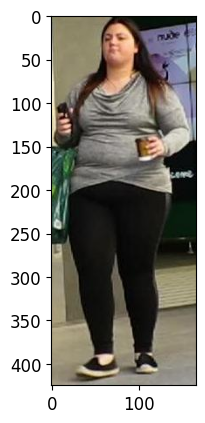

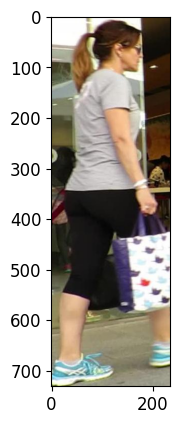

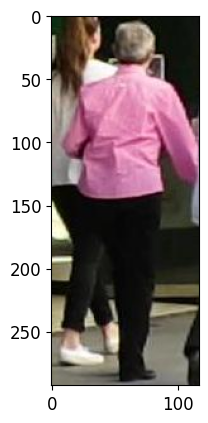

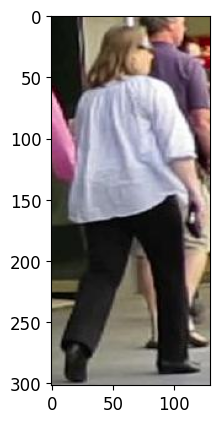

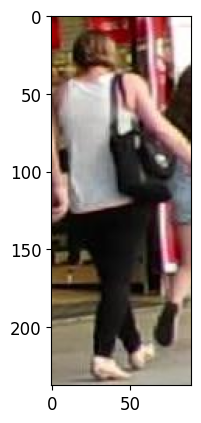

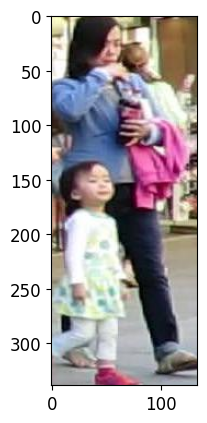

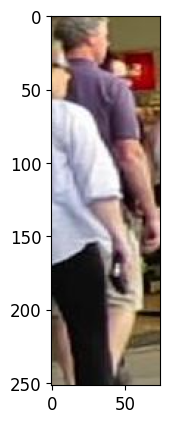

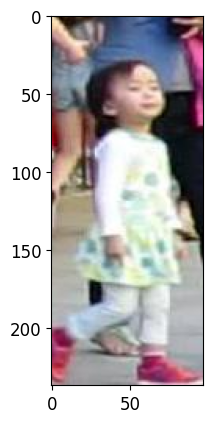

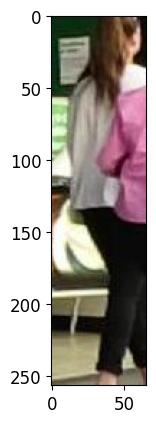

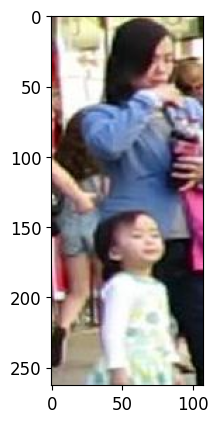

KeyboardInterrupt: ignored

In [16]:
images = []
for filename in os.listdir(str(output_path)):
    image = Image.open(os.path.join(str(output_path), filename))
    show_img(image)
    #print(image.size)
    image = transform(image)

    #show_img(transform_to_pil(image))
    #print(transform_to_pil(image).size)
    #input()
    images.append(image)

In [10]:
images[15].shape

torch.Size([3, 768, 256])

Теперь возьмем классификатор, обрежем выходной слой и пустим через него наши изображения, после чего возьмем значения нового выходного слоя.

In [11]:
resnet = models.resnet18(pretrained=True)

# Удаление последнего слоя
modules = list(resnet.children())[:-1]
resnet = torch.nn.Sequential(*modules)

# Отключение обучения для всех слоев
for p in resnet.parameters():
    p.requires_grad = False

# Пропуск изображений через модель
features = []
for image in images:
    # Изменение размера изображения и добавление размерности пакета
    image = torch.unsqueeze(image, 0)
    # Пропуск изображения через модель
    feature = resnet(image)
    # Удаление размерности пакета и добавление в список признаков
    features.append(torch.squeeze(feature))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 161MB/s]


Применим алгоритм кластеризации DBScan для списка features. По идее, кластерами должны люди, которые появляются из кадра в кадр на изначальных изобажениях.

In [35]:
from sklearn.cluster import DBSCAN
import numpy as np

# Преобразование списка признаков в NumPy массив
features = [tensor.tolist() for tensor in features]
features = np.array(features)

# Создание и обучение модели DBSCAN
dbscan = DBSCAN(eps=2, min_samples=5)
clusters = dbscan.fit_predict(features)

# Вывод количества кластеров и меток кластеров для каждого изображения
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
print(f'Количество кластеров: {n_clusters}')
print(f'Метки кластеров для каждого изображения: {clusters}')

Количество кластеров: 1
Метки кластеров для каждого изображения: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [21]:
list(resnet.children())[-1]

AdaptiveAvgPool2d(output_size=(1, 1))

In [7]:
# Получение индексов первых elem_nums минимальных элементов
def min_elems(my_list, elem_nums):
    min_indices = [index for value, index in sorted((value, index) for index, value in enumerate(my_list))[:elem_nums]]
    return min_indices

min_elems([2, 1, 3], 2)

[1, 0]

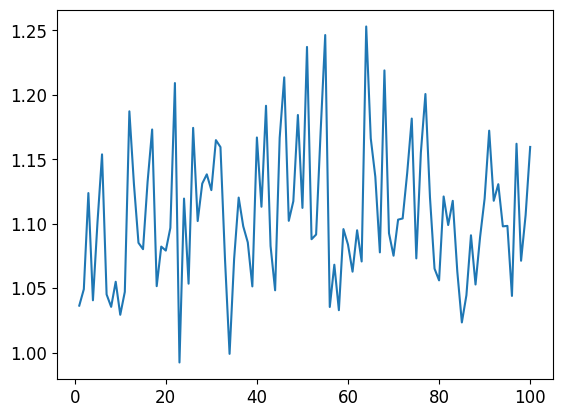

[22, 33, 84, 9, 57]


In [12]:
distances = []
for i in range(1, 101):
    dist = torch.dist(features[0], features[i]).item()
    distances.append(dist)

plt.plot(np.arange(1, 101), distances)
plt.show()
print(min_elems(distances, 5))

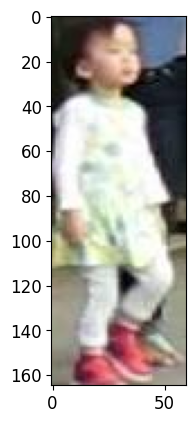

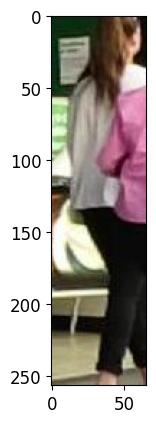

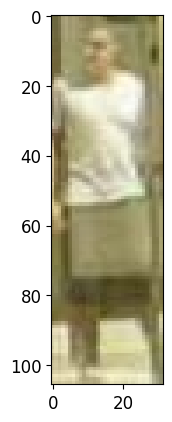

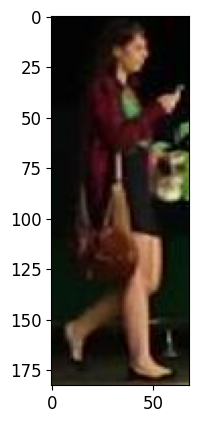

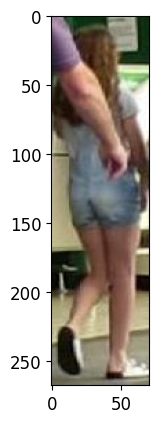

In [15]:
# Вывод изображений людей с маленькими distances от некоторого эталона.
def show_close_images(path, mins):
    i = 0
    dic = {}
    for image in path.ls():
        if i in mins:
            img = Image.open(image)
            show_img(img)
        i += 1

show_img()
show_close_images(output_path, min_elems(distances, 5))


In [31]:
x = torch.randn(3, 4)
print(x.shape) # torch.Size([3, 4])

x = torch.unsqueeze(x, 0)
print(x.shape) # torch.Size([1, 3, 4])
x = torch.unsqueeze(x, len(x) - 1)
print(x.shape) # torch.Size([1, 3, 4])

x = torch.squeeze(x)
print(x.shape)
x = torch.unsqueeze(x, 1)
print(x.shape) # torch.Size([1, 1, 3, 4])

torch.Size([3, 4])
torch.Size([1, 3, 4])
torch.Size([1, 1, 3, 4])
torch.Size([3, 4])
torch.Size([3, 1, 4])


In [ ]:
def label_func(f): return f[0].isupper()

In [ ]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

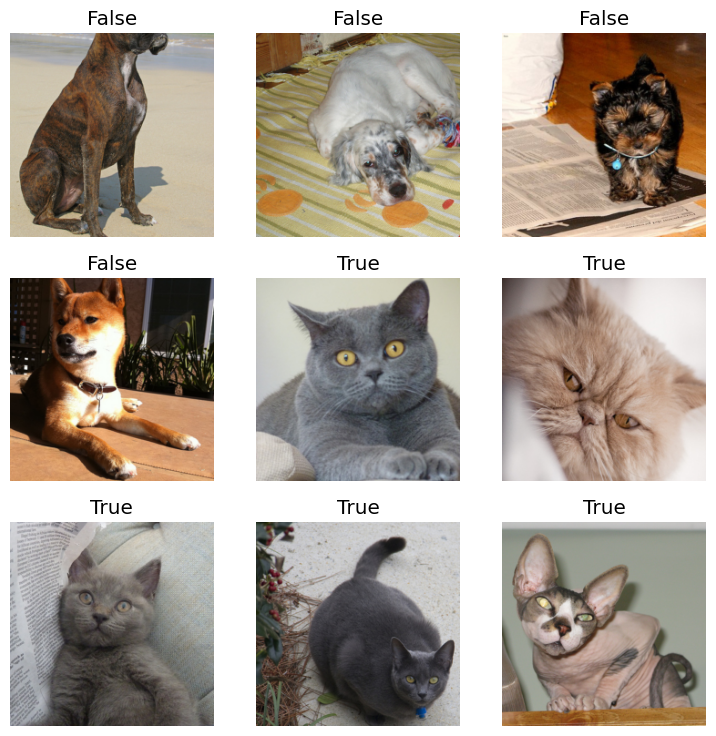

In [ ]:
dls.show_batch()

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 101MB/s]


epoch,train_loss,valid_loss,error_rate,time


epoch,train_loss,valid_loss,error_rate,time
0,0.156017,0.018098,0.007442,01:09


epoch,train_loss,valid_loss,error_rate,time
0,0.061350,0.019342,0.006089,01:05
